<a href="https://colab.research.google.com/github/Tanejavanshika/Data-visualization-/blob/main/tswd_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import io
from google.colab import files
uploaded = files.upload()

Saving tswdproject.csv to tswdproject (2).csv


**EXPLORATORY DATA ANALYSIS**

In [76]:
# Reading the csv file into a pandas dataframe object df
df = pd.read_csv("tswdproject.csv")
#basic operations
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28-Aug-20,04-03-2021,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01-Oct-16,04-03-2021,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22-Sep-11,04-03-2021,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [77]:
# Look for number of rows and columns in the dataet
df.shape

(15480, 29)

In [78]:
# Basic Statistical constants of each column
df.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [79]:
#checking for the existence of null value
df.isnull().values.any()

True

In [80]:
# Datatype of each column
df.dtypes

Title                     object
Genre                     object
Tags                      object
Languages                 object
Series or Movie           object
Hidden Gem Score         float64
Country Availability      object
Runtime                   object
Director                  object
Writer                    object
Actors                    object
View Rating               object
IMDb Score               float64
Rotten Tomatoes Score    float64
Metacritic Score         float64
Awards Received          float64
Awards Nominated For     float64
Boxoffice                 object
Release Date              object
Netflix Release Date      object
Production House          object
Netflix Link              object
IMDb Link                 object
Summary                   object
IMDb Votes               float64
Image                     object
Poster                    object
TMDb Trailer              object
Trailer Site              object
dtype: object

In [81]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df.dtypes

Title                            object
Genre                            object
Tags                             object
Languages                        object
Series or Movie                  object
Hidden Gem Score                float64
Country Availability             object
Runtime                          object
Director                         object
Writer                           object
Actors                           object
View Rating                      object
IMDb Score                      float64
Rotten Tomatoes Score           float64
Metacritic Score                float64
Awards Received                 float64
Awards Nominated For            float64
Boxoffice                        object
Release Date             datetime64[ns]
Netflix Release Date     datetime64[ns]
Production House                 object
Netflix Link                     object
IMDb Link                        object
Summary                          object
IMDb Votes                      float64


**Percentage of movies and Series**

In [82]:
#separate movies and Series:
movie_rows = df.loc[df["Series or Movie"] == "Movie"]
series_rows = df.loc[df["Series or Movie"] == "Series"]

# Calculate percentages of movies and series:
movies_per = round(movie_rows.shape[0] / df["Series or Movie"].shape[0] * 100, 2)
series_per = round(series_rows.shape[0] / df["Series or Movie"].shape[0] * 100, 2)

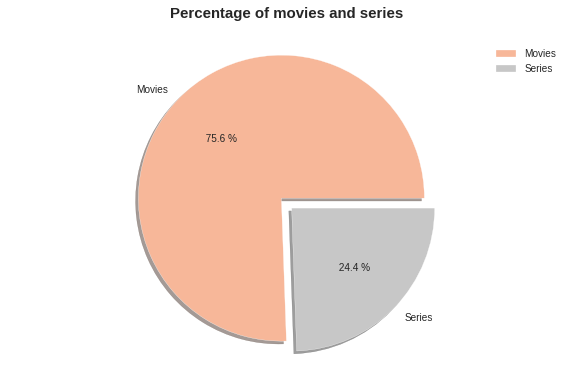

In [83]:
fig = plt.figure(figsize=(10, 6))

plt.pie([movies_per, series_per], labels=["Movies", "Series"], shadow=True, startangle=0, autopct ='% 1.1f %%', explode=(0, 0.1), colors=sns.color_palette("RdGy", n_colors=2))
plt.axis('equal')

plt.title('Percentage of movies and series\n', fontsize=15, fontweight='bold')
plt.legend(["Movies", "Series"], loc=0);

**Top 10 Languages**

In [84]:
#group the number of titles produced per Language and then will plot two figures
most_titles_produced = df.groupby('Languages').count().sort_values('Title',ascending=False).head(10)

most_titles_produced.reset_index(inplace=True)
most_titles_produced

,Languages,Title,Genre,Tags,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,English,5133,5110,5116,5133,4934,5130,5132,3876,4233,5036,4078,4934,2761,2242,2219,2907,1878,4939,5133,2468,5133,4941,5128,4934,5133,4422,3067,3067
1,Japanese,1213,1197,1208,1213,1153,1211,1213,774,770,1191,497,1153,275,66,293,371,82,1158,1213,188,1213,1146,1213,1153,1213,992,393,393
2,Korean,541,540,540,541,532,541,541,290,271,533,187,532,157,21,278,317,55,533,541,39,541,512,541,532,541,481,183,183
3,Spanish,382,379,381,382,365,382,382,274,303,370,205,365,79,25,139,184,30,363,382,43,382,346,382,365,382,280,109,109
4,Hindi,329,328,327,329,323,328,329,299,286,319,190,323,193,11,137,170,97,315,329,78,329,317,329,323,329,284,174,174
5,"English, Spanish",267,267,267,267,267,267,267,251,247,263,254,267,230,224,175,205,205,265,267,216,267,260,266,267,267,257,228,228
6,French,252,249,250,252,241,252,252,200,211,246,109,241,107,39,87,91,40,244,252,62,252,236,252,241,252,201,92,92
7,German,203,202,202,203,194,202,203,141,151,202,47,194,43,15,100,100,14,195,203,45,203,184,203,194,203,161,51,51
8,"English, French",161,161,160,161,161,160,161,144,147,159,150,161,127,116,107,131,109,157,161,116,161,159,161,161,161,157,132,132
9,Mandarin,157,157,157,157,150,157,157,100,88,154,52,150,54,23,75,101,31,153,157,28,157,142,157,150,157,114,65,65


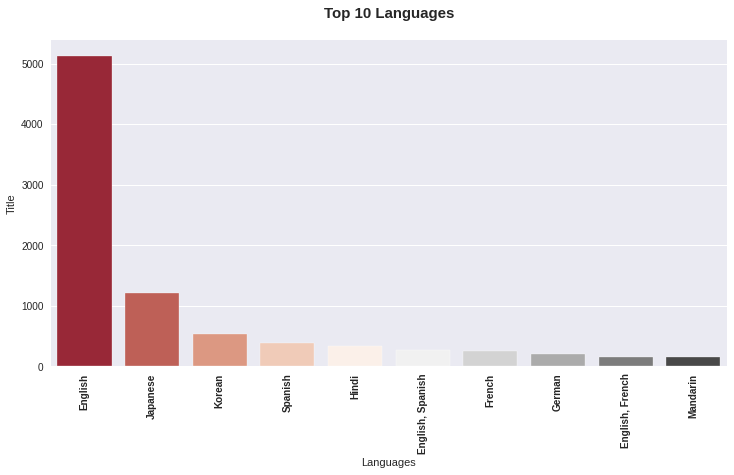

In [85]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(x=most_titles_produced.Languages, y=most_titles_produced.Title, data=most_titles_produced, palette="RdGy")
#hue colors: Movies and TV

ax.set_xticklabels(most_titles_produced.Languages, fontweight='bold', rotation='90')
ax.set_title('Top 10 Languages\n', fontsize=15, fontweight='bold');

**Availability of the shows/movies in different countries**

In [97]:
#group the number of titles produced per country and then will plot two figures
most_available_country = df.groupby('Country Availability').count().sort_values('Title',ascending=False).head(10)

most_available_country.reset_index(inplace=True)
most_available_country

,Country Availability,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,difference,Hidden_gem_score,year
0,Japan,1339,1009,1333,1018,1339,970,1339,779,758,1008,361,970,297,100,283,334,89,990,1339,215,1339,979,1339,970,1339,840,375,375,990,970,990
1,South Korea,715,618,708,616,715,593,715,564,535,608,338,593,332,162,344,399,203,610,715,187,715,610,715,593,715,565,382,382,610,593,610
2,United Kingdom,340,310,340,306,340,302,340,213,236,308,229,302,160,122,163,202,109,303,340,139,340,309,340,302,340,298,165,165,303,302,303
3,"Switzerland,Germany",315,258,314,257,315,255,315,196,208,258,132,255,117,77,144,150,73,256,315,124,315,252,315,255,315,231,123,123,256,255,256
4,United States,305,291,304,286,305,286,305,214,255,292,258,286,165,124,141,183,109,283,305,143,305,289,305,286,305,276,165,165,283,286,283
5,Poland,279,213,277,210,279,201,279,196,188,208,76,201,82,45,89,122,41,205,279,57,279,205,279,201,279,191,106,106,205,201,205
6,Italy,237,218,236,213,237,210,237,206,208,216,72,210,94,49,88,119,48,211,237,99,237,214,235,210,237,202,82,82,211,210,211
7,Canada,171,171,171,169,171,170,171,148,165,168,155,170,116,118,105,125,108,169,171,112,171,171,171,170,171,167,137,137,169,170,169
8,"Czech Republic,Slovakia",168,119,168,119,168,113,168,115,115,116,37,113,37,18,46,60,17,113,168,26,168,104,168,113,168,100,40,40,113,113,113
9,Thailand,162,125,162,126,162,122,162,111,88,125,24,122,36,13,44,67,16,117,162,17,162,118,162,122,162,102,73,73,117,122,117


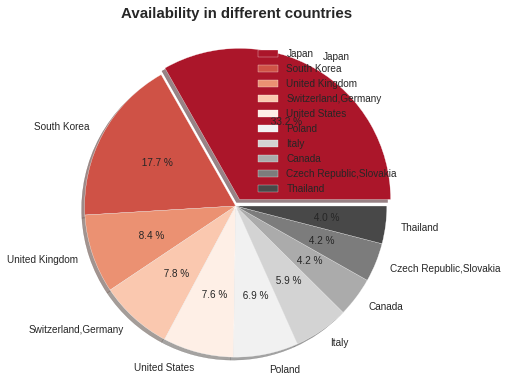

In [107]:
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[10], width_ratios=[20, 10])

explode = [0 for _ in range(10)]
explode[0] = 0.05

ax2 = plt.subplot(gs[1])

labels = most_available_country["Country Availability"]
sizes = most_available_country.Title 

ax2.pie(sizes, labels=labels, shadow=True, startangle=0, autopct ='% 1.1f %%', explode=explode, colors=sns.color_palette("RdGy", n_colors=10))
ax2.axis('equal')

ax2.set_title('Availability in different countries\n', fontsize=15, fontweight='bold')
plt.legend(labels, loc=0);

**Awards Recieved v/s Awards Nominated for**

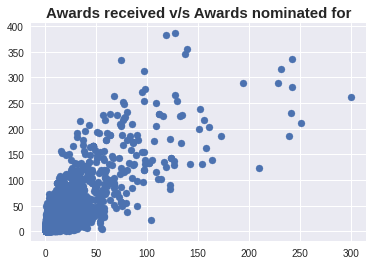

In [88]:
import matplotlib.pyplot as plt
Awards_recieved=df["Awards Received"]
Awards_nominated_for=df["Awards Nominated For"]
plt.scatter(Awards_recieved,Awards_nominated_for)
plt.title('Awards received v/s Awards nominated for', fontsize=15, fontweight='bold');

**Top Genres on netflix**

In [89]:
top_listed_genre = df.set_index('Title').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top_listed_genre

Title
Lets Fight Ghost                                Crime
Lets Fight Ghost                                Drama
Lets Fight Ghost                              Fantasy
Lets Fight Ghost                               Horror
Lets Fight Ghost                              Romance
                                              ...    
DreamWorks Holiday Classics                    Family
DreamWorks Kung Fu Panda Awesome Secrets    Animation
DreamWorks Kung Fu Panda Awesome Secrets       Action
DreamWorks Kung Fu Panda Awesome Secrets       Comedy
DreamWorks Kung Fu Panda Awesome Secrets       Family
Length: 35708, dtype: object

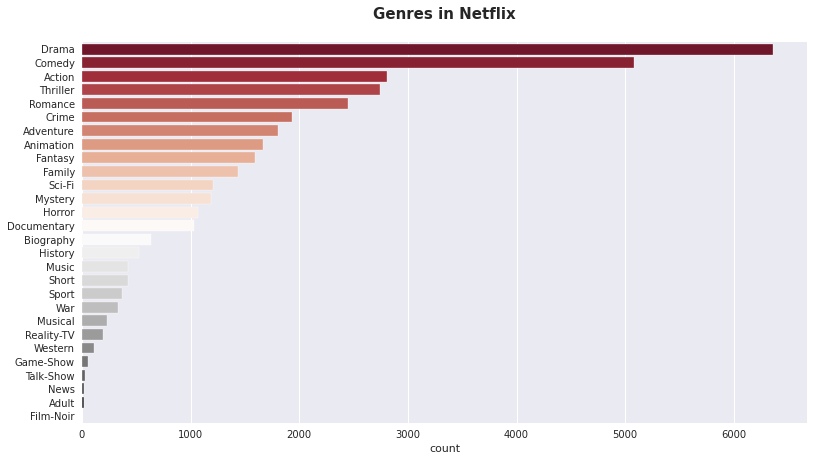

In [90]:
plt.figure(figsize=(13,7))
plt.title('Genres in Netflix\n', fontsize=15, fontweight='bold')

sns.set_style(style='white')

sns.countplot(y = top_listed_genre, order=top_listed_genre.value_counts().index[:], palette='RdGy');

In [91]:
genre_movies=df[df["Series or Movie"] == 'Movie']['Genre']
genre_movies

1                         Comedy
2                Drama, Thriller
4        Animation, Short, Drama
5                Comedy, Romance
8                          Drama
                  ...           
15466                Documentary
15467         Documentary, Music
15469                        NaN
15470                        NaN
15473                     Comedy
Name: Genre, Length: 11697, dtype: object

**Release Date v/s Netflix Release date**

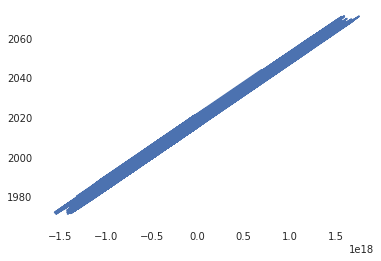

In [92]:
df["difference"]=(df["Release Date"]-df["Netflix Release Date"])
x_values = df["difference"]
y_values= df["Release Date"]
plt.plot(x_values, y_values)


**Correlation between different scores and ratings**

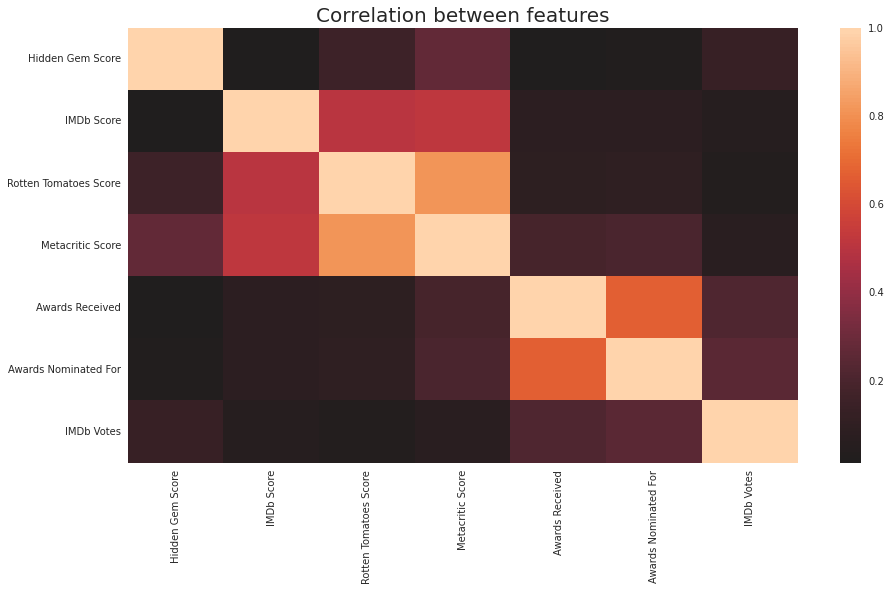

In [93]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df.corr()**2,
            center=0
           );
plt.title("Correlation between features", size = 20);

**Distribution of Hidden Gem score among different movies or series** (hidden gem score shows a low review count and high rating. The lower the review count and higher the user rating, the higher the hidden gem score.)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



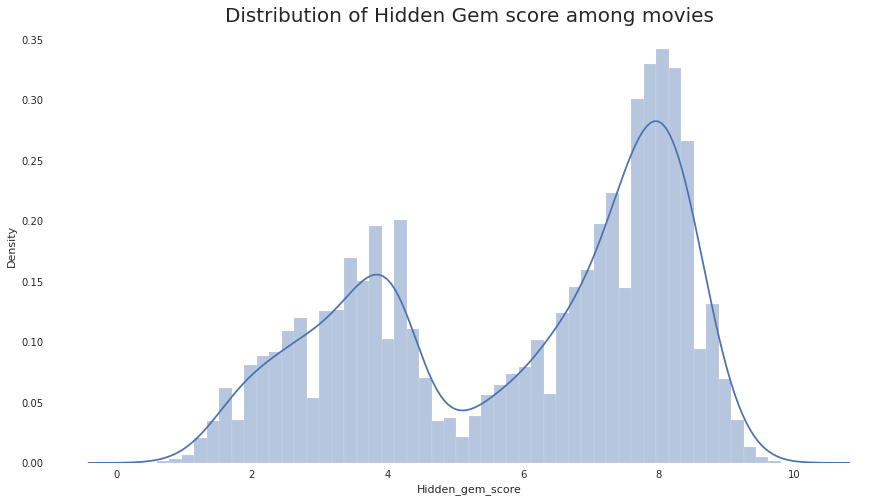

In [94]:
df["Hidden_gem_score"]=df["Hidden Gem Score"]
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.Hidden_gem_score,bins = 50);
plt.title("Distribution of Hidden Gem score among movies", size = 20);

**Top 10 Hidden Gems**

In [108]:
df_series_hdg = df_series.dropna(subset=['Hidden Gem Score'])
df_series_hdg = df_series_hdg.sort_values(by = 'Hidden Gem Score', ascending = False)
top_s_10_list = df_series_hdg[:10]
top_s_10_list.reset_index(drop=True, inplace=True)
print('The 10 Best Hidden Gems on Tv Series are:\n',top_s_10_list['Title'])


The 10 Best Hidden Gems on Tv Series are:
 0                 Flavours of Romania
1                 A Lion in the House
2                            Im Sorry
3                    Regiment Diaries
4                        Numberblocks
5                            Stranger
6                        The Lost Art
7                          Doble Kara
8                            Kopitiam
9    Aunty Donnas Big Ol House of Fun
Name: Title, dtype: object


In [109]:
df_movie_hdg = df_movie.dropna(subset=['Hidden Gem Score'])
df_movie_hdg = df_movie_hdg.sort_values(by = 'Hidden Gem Score', ascending = False)
top_m_10_list = df_movie_hdg[:10]
top_m_10_list.reset_index(drop=True, inplace=True)
print('The 10 Best Hidden Gems in Movies are:\n',top_m_10_list['Title'])

The 10 Best Hidden Gems in Movies are:
 0                             No Festival
1                         The Dream House
2                           Horsin Around
3                              Conspiracy
4                              Green Gold
5                                One Girl
6                        The Last Animals
7                         The Consuls Son
8                          Bye Bye London
9    Invisible Essence: The Little Prince
Name: Title, dtype: object


**Distribution of years among movies**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



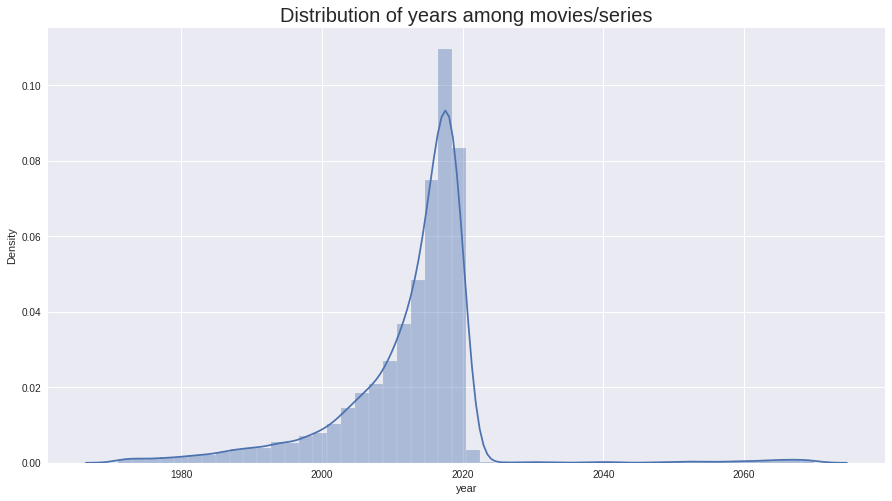

In [110]:
df["year"]=df["Release Date"].dt.year
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.year,bins = 50);
plt.title("Distribution of years among movies/series", size = 20);

**Word Cloud**

Text(0.5, 1.0, 'Key Words in Movie/Series Titles\n')

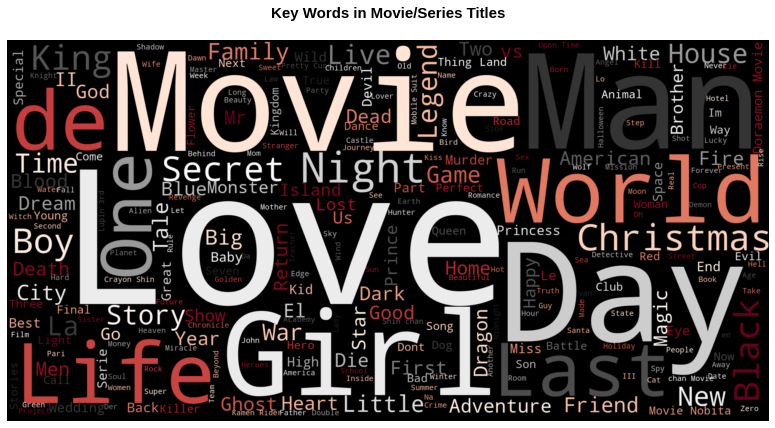

In [96]:
#use wordcloud to represent text data in which the size of each word indicates its frequency or importance.

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

plt.style.use('seaborn')

from PIL import Image

words = df["Title"].str.split("(").str[0].value_counts().keys()

word_cloud = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="RdGy",background_color="black").generate(" ".join(words))

plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie/Series Titles\n",color='black',fontsize=15, fontweight='bold')

